### ЛАБОРАТОРНА РОБОТА № 4 Варіант 10
### Оцінювання параметрів різницевого рівняння авторегресії із ковзним середнім на основі експериментальних даних за допомогою МНК і РМНК
#### Завдання виконала команда № 10

In [522]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import r2_score
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

Завантажуємо данні з файлів: Revolns.txt, NONREVNS.txt

In [523]:
rev=np.loadtxt(r"Revolns.txt ")
nonrev=np.loadtxt(r"NONREVNS.txt")

rev_breaker = 480
nonrev_breaker = 780

rev_test=rev[rev_breaker:]
rev_train=rev[:rev_breaker]
nonrev_test=nonrev[nonrev_breaker:]
nonrev_train=nonrev[:nonrev_breaker]

Зображаємо данні

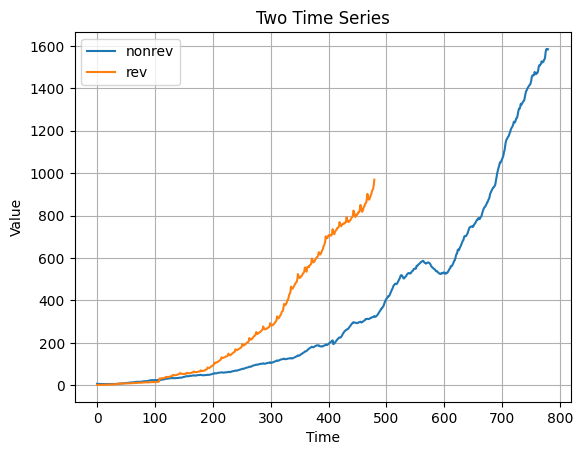

In [524]:
plt.plot(nonrev_train, label='nonrev')
plt.plot(rev_train, label='rev')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Two Time Series')
plt.legend()
plt.grid(True)
plt.show()

### Спробуємо лінійний тренд для rev

In [525]:
rev_x=np.arange(1, len(rev_train)+1)
rev_x= rev_x[:,np.newaxis]
rev_y= rev_train[:,np.newaxis]

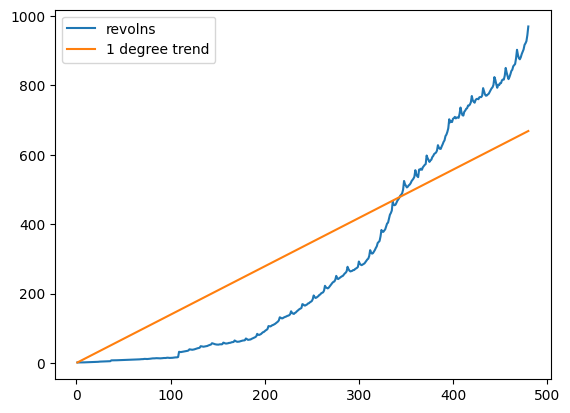

In [526]:
model1_1 = sm.OLS(rev_y, rev_x).fit()
rev_ypred1 = model1_1.predict(rev_x) 

plt.plot(rev_x,rev_y, label='revolns')
plt.plot(rev_x,rev_ypred1, label='1 degree trend')
plt.legend()

Отримали модель:

In [527]:
coefficients1_1 = model1_1.params
print('y(k)=',coefficients1_1[0], '* k')

y(k)= 1.3923013887777158 * k


Спробуємо лінійний тренд для nonrev

In [528]:
nonrev_x=np.arange(1, len(nonrev_train)+1)
nonrev_x= nonrev_x[:,np.newaxis]
nonrev_y= nonrev_train[:,np.newaxis]

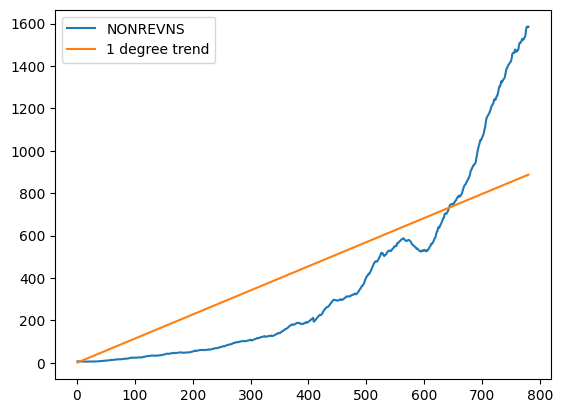

In [529]:
model1_2 = sm.OLS(nonrev_y, nonrev_x).fit()
nonrev_ypred1 = model1_2.predict(nonrev_x) 

plt.plot(nonrev_x,nonrev_y, label='NONREVNS')
plt.plot(nonrev_x,nonrev_ypred1, label='1 degree trend')
plt.legend()

Отримали модель:

In [530]:
coefficients1_2 = model1_2.params
print('y(k)=',coefficients1_2[0], '* k')

y(k)= 1.1374753611196484 * k


### Спробуємо тренд 2-го порядку:

In [531]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(rev_x)

model2_1 = sm.OLS(rev_y, X_poly).fit()
rev_ypred2 = model2_1.predict(X_poly)

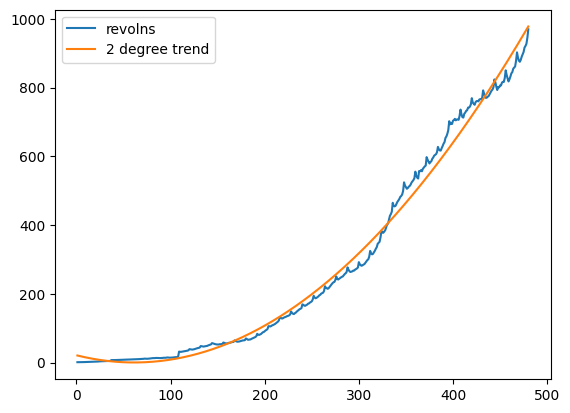

In [532]:
plt.plot(rev_x,rev_y, label='revolns')
plt.plot(rev_x,rev_ypred2, label='2 degree trend')
plt.legend()

Отримали модель:

In [533]:
coefficients2_1 = model2_1.params
print('y(k)=',coefficients2_1[0],'+',coefficients2_1[1], '* k +',coefficients2_1[2], '* k^2')

y(k)= 21.532056280100008 + -0.6836592117036873 * k + 0.005574041257283433 * k^2


За графіком можна помітити, що покищо найкращим трендом є тренд 2-го порядку

Спробуємо тренд 2-го порядку для nonrev

In [534]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(nonrev_x)

model2_2 = sm.OLS(nonrev_y, X_poly).fit()
nonrev_ypred2 = model2_2.predict(X_poly)

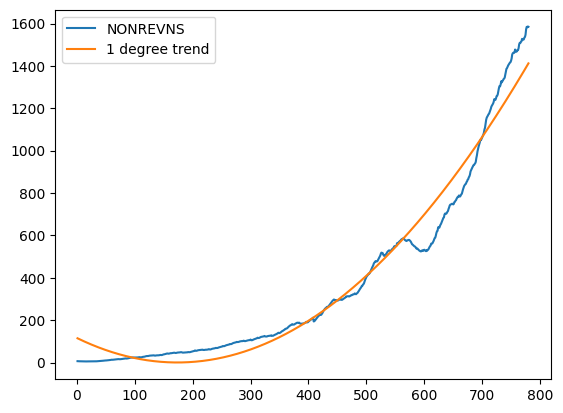

In [535]:
plt.plot(nonrev_x,nonrev_y, label='NONREVNS')
plt.plot(nonrev_x,nonrev_ypred2, label='1 degree trend')
plt.legend()

Отримали модель:

In [536]:
coefficients2_2 = model2_2.params
print('y(k)=',coefficients2_2[0],'+', coefficients2_2[1], '* k +',coefficients2_2[2], '* k^2')

y(k)= 115.87884861994351 + -1.331364457178981 * k + 0.0038370951229566384 * k^2


### Спробуємо тренд 3-го порядку:

In [537]:
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(rev_x)

model3_1 = sm.OLS(rev_y, X_poly).fit()
rev_ypred3 = model3_1.predict(X_poly)

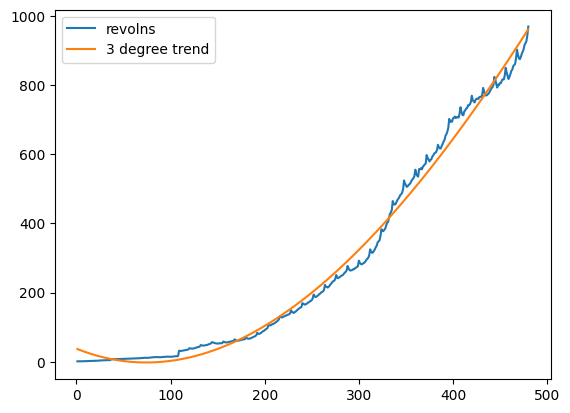

In [538]:
plt.plot(rev_x,rev_y, label='revolns')
plt.plot(rev_x,rev_ypred3, label='3 degree trend')
plt.legend()

In [539]:
coefficients3_1 = model3_1.params
print('y(k)=',coefficients3_1[0],'+',coefficients3_1[1], '* k +',coefficients3_1[2], '* k^2 +', coefficients3_1[3], '* k^3' )

y(k)= 38.04382557003481 + -1.0934645446493558 * k + 0.007701791740989176 * k^2 + -2.949065119498697e-06 * k^3


Спробуємо тренд 3-го порядку для nonrev

In [540]:
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(nonrev_x)

model3_2 = sm.OLS(nonrev_y, X_poly).fit()
nonrev_ypred3 = model3_2.predict(X_poly)

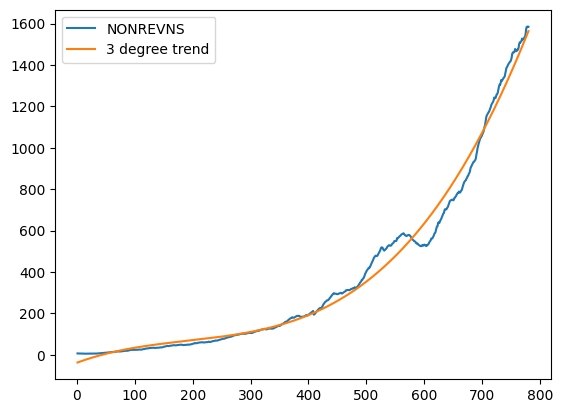

In [541]:
plt.plot(nonrev_x,nonrev_y, label='NONREVNS')
plt.plot(nonrev_x,nonrev_ypred3, label='3 degree trend')
plt.legend()

In [542]:
coefficients3_2 = model3_2.params
print('y(k)=',coefficients3_2[0],'+', coefficients3_2[1], '* k +',coefficients3_2[2], '* k^2 +',coefficients3_2[3], '* k^3')

y(k)= -38.259193866353435 + 1.029395280974935 * k + -0.003714915270087307 * k^2 + 6.446445064433736e-06 * k^3


### ARIMA

Для першого набору:

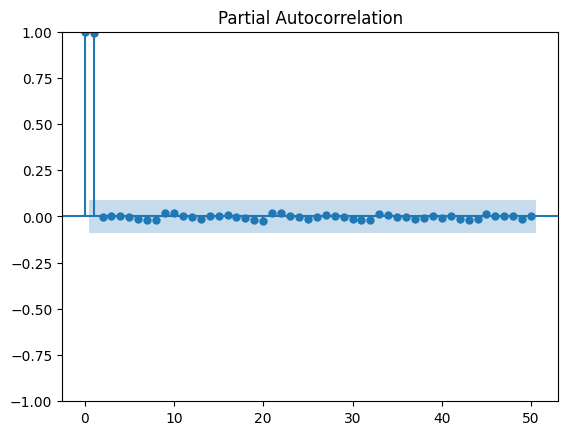

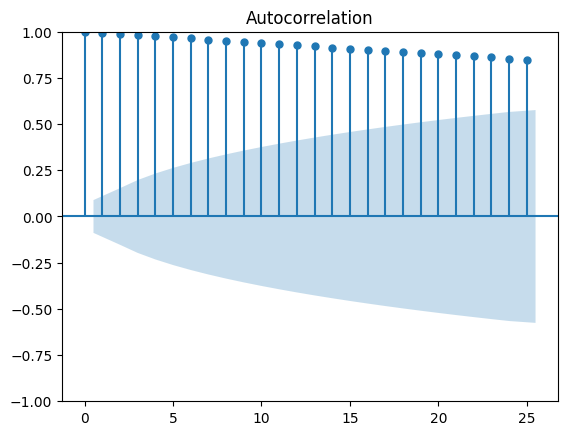

In [543]:
plot_pacf(rev, lags=50)
plot_acf(rev, lags=25)
plt.show()

In [544]:
stepwise_fit = auto_arima(y=rev_y, trace= True, stepwise=True, 
                          max_p=8, max_q=8,
                          start_p=2, start_q=2,
                          method='nm', 
                          suppress_stepwise=True, suppress_warnings=True,
                          seasonal=True, m=12) 
#  start_p=10, start_q=10, max_p=15, max_q=15    |   method='powell', 'bfgs', 'nm'
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=2466.447, Time=0.45 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=3271.804, Time=0.04 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=2732.242, Time=0.43 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=2900.104, Time=0.42 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=2583.076, Time=0.32 sec
 ARIMA(2,2,2)(2,0,1)[12]             : AIC=2518.652, Time=0.61 sec
 ARIMA(2,2,2)(1,0,2)[12]             : AIC=2503.268, Time=0.89 sec
 ARIMA(2,2,2)(0,0,0)[12]             : AIC=3199.810, Time=0.15 sec
 ARIMA(2,2,2)(0,0,2)[12]             : AIC=2828.037, Time=0.66 sec
 ARIMA(2,2,2)(2,0,0)[12]             : AIC=2522.537, Time=0.55 sec
 ARIMA(2,2,2)(2,0,2)[12]             : AIC=3550.760, Time=0.89 sec
 ARIMA(1,2,2)(1,0,1)[12]             : AIC=2284.703, Time=0.45 sec
 ARIMA(1,2,2)(0,0,1)[12]             : AIC=2765.299, Time=0.41 sec
 ARIMA(1,2,2)(1,0,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  480
Model:             SARIMAX(1, 2, 2)x(1, 0, [1], 12)   Log Likelihood               -1136.351
Date:                              Thu, 16 May 2024   AIC                           2284.703
Time:                                      20:27:46   BIC                           2309.721
Sample:                                           0   HQIC                          2294.538
                                              - 480                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6941      0.258     -2.689      0.007      -1.200      -0.188
ma.L1         -0.2275      0.272     -0.836      0.403      -0.761       0.306
ma.L2         -0.5538      0.241     -2.299      0.021      -1.026      -0.082
ar.S.L12       0.9700      0.010     97.421      0.000       0.950       0.990
ma.S.L12      -0.5517      0.036    -15.484      0.000      -0.622      -0.482
sigma2         6.4618      0.186     34.820      0.000       6.098       6.826
===================================================================================
Ljung-Box (L1) (Q):                   1.94   Jarque-Bera (JB):              2733.66
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               7.02   Skew:                             1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Оскільки в часовому ряді revolns прослідковується сезонність - зробимо сезонну декомпозицію

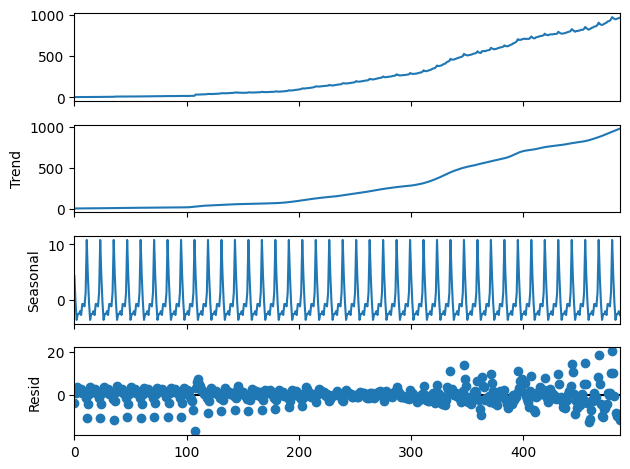

In [545]:
tsdf=pd.DataFrame(rev)
result = seasonal_decompose(tsdf, model='additive',extrapolate_trend='freq', period=12)
result.plot()
plt.show()

In [546]:
warnings.filterwarnings('ignore')
p, d, q = 4, 2, 4
P, D, Q, s = 1, 0, 1, 12
arima_model_rev = ARIMA(rev_y, order=(p, d, q), seasonal_order=(P, D, Q, s), trend='n') # seasonal_order=(P, D, Q, s),
model4_1 = arima_model_rev.fit()

In [547]:
arima_rev = model4_1.predict(start=1, end=len(rev_train), exog=rev_train)
arima_rev

array([  2.10000598,   1.40008759,   1.40005052,   1.54221192,
         1.51821606,   1.64832637,   1.63177027,   1.7385853 ,
         1.8794665 ,   1.92153533,   1.98035477,   2.15535295,
         2.3072531 ,   2.30460405,   2.39891641,   2.51527629,
         2.71735563,   2.72056119,   2.91992014,   3.01974441,
         3.21605799,   3.22939737,   3.50756453,   3.93816781,
         3.93282263,   4.04216896,   4.19319479,   4.16144593,
         4.22123754,   4.24856969,   4.41135466,   4.56227343,
         4.69770063,   4.77829448,   5.09943245,   5.31496384,
         7.80355888,   7.72843984,   7.62878767,   7.76284685,
         7.68472228,   7.83253839,   7.92731492,   8.10939711,
         8.30591448,   8.11266147,   8.48932664,   9.63259212,
         8.40490052,   8.15073592,   8.29876007,   8.37632529,
         8.5100605 ,   8.78251204,   8.89300432,   9.27522236,
         9.38348418,   9.21645276,   9.53519993,  10.39794804,
         9.65373259,   9.63080096,   9.66586649,   9.69

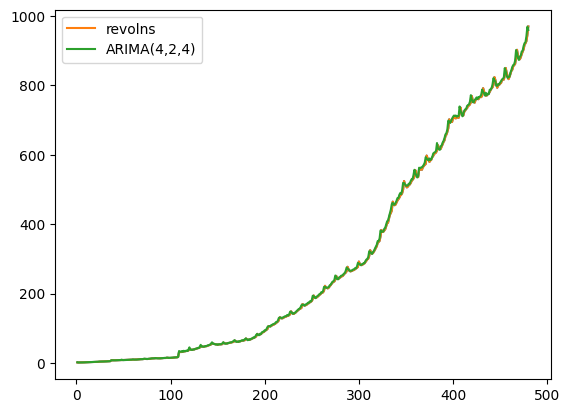

In [548]:
plt.plot(rev_x, rev_train)
plt.plot(rev_x,rev_y, label='revolns')
plt.plot(rev_x, arima_rev, label=f'ARIMA({p},{d},{q})')
plt.legend()

Для другого набору:

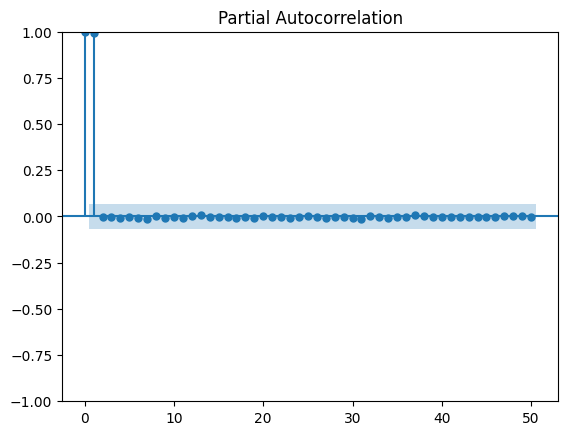

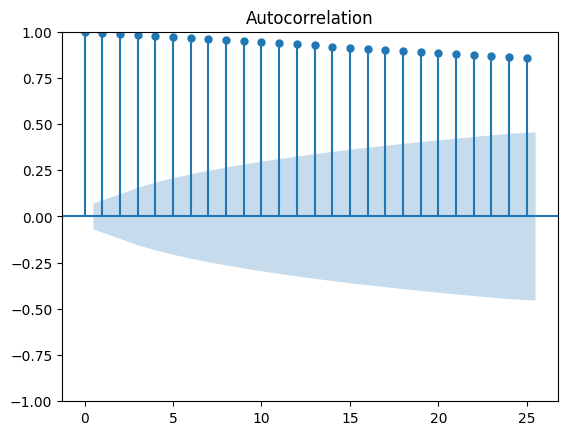

In [549]:
plot_pacf(nonrev, lags=50)
plot_acf(nonrev, lags=25)
plt.show()

In [550]:
stepwise_fit = auto_arima(y=nonrev_y, trace= True, stepwise=True,
                          max_p=8, max_q=8,
                          start_p=2, start_q=2,
                          method='nm',
                          suppress_stepwise=True, suppress_warnings=True,
                          seasonal=False)
#  start_p=10, start_q=10, max_p=15, max_q=15    |   method='powell', 'bfgs', 'nm'
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3902.907, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4200.965, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4089.359, Time=0.22 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3933.205, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4198.966, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3913.834, Time=0.34 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3900.535, Time=0.29 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3898.235, Time=0.29 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=3898.916, Time=0.31 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4013.527, Time=0.29 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3896.564, Time=0.22 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3931.292, Time=0.23 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=4087.359, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=3899.928, Time=0.23 sec
 ARIMA(1,2,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  780
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -1945.282
Date:                Thu, 16 May 2024   AIC                           3896.564
Time:                        20:27:59   BIC                           3910.534
Sample:                             0   HQIC                          3901.938
                                - 780                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2438      0.023     10.386      0.000       0.198       0.290
ma.L1         -0.9217      0.010    -88.680      0.000      -0.942      -0.901
sigma2         8.6827      0.186     46.569      0.000       8.317       9.048
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2878.89
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              99.81   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [551]:
p, d, q = 1, 2, 1
P, D, Q, s = 1, 0, 1, 12
arima_model_nonrev = ARIMA(nonrev_y, order=(p, d, q), trend='n') # seasonal_order=(P, D, Q, s),
model4_2 = arima_model_nonrev.fit()

In [552]:
arima_nonrev = model4_2.predict(start=1, end=len(nonrev_train), exog=nonrev_train)

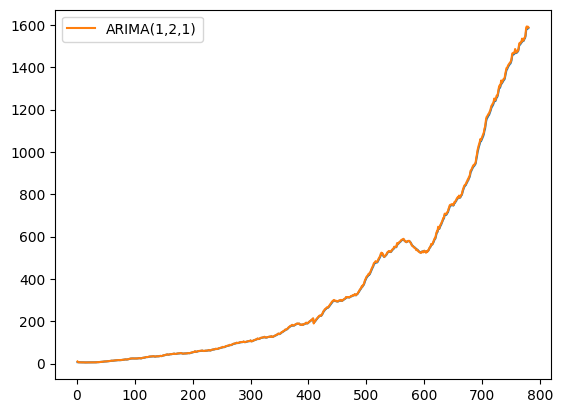

In [553]:
plt.plot(nonrev_x, nonrev_train)
plt.plot(nonrev_x, arima_nonrev, label=f'ARIMA({p},{d},{q})')
plt.legend()

### Статистичні характеристики:

#### R^2:

Для першого набору:

In [554]:
# R^2 для першого набору:
r_sq1_1=r2_score(rev_y, rev_ypred1)
r_sq2_1=r2_score(rev_y, rev_ypred2)
r_sq3_1=r2_score(rev_y, rev_ypred3)
r_sq4_1=r2_score(rev_y, arima_rev)

In [555]:
print('Тренд 1-го порядку: ',r_sq1_1)
print('Тренд 2-го порядку: ',r_sq2_1)
print('Тренд 3-го порядку: ',r_sq3_1)
print('ARIMA(4, 2, 4):',r_sq4_1)

Тренд 1-го порядку:  0.7776392387510156
Тренд 2-го порядку:  0.9919196268722741
Тренд 3-го порядку:  0.9923589539411036
ARIMA(4, 2, 4): 0.9997008040329759


Для другого набору:

In [556]:
r_sq1_2=r2_score(nonrev_y, nonrev_ypred1)
r_sq2_2=r2_score(nonrev_y, nonrev_ypred2)
r_sq3_2=r2_score(nonrev_y, nonrev_ypred3)
r_sq4_2=r2_score(nonrev_y, arima_nonrev)

In [557]:
print('Тренд 1-го порядку: ',r_sq1_2)
print('Тренд 2-го порядку: ',r_sq2_2)
print('Тренд 3-го порядку: ',r_sq3_2)
print('ARIMA(1, 2, 1):',r_sq4_2)

Тренд 1-го порядку:  0.6908214194111604
Тренд 2-го порядку:  0.9693556457743135
Тренд 3-го порядку:  0.9883134979128743
ARIMA(1, 2, 1): 0.9999407233130572


#### Sum squared resid

In [558]:
def sqr (y, y_pred):
    return np.sum((y/1000-y_pred/1000)**2)

Для першого набору:

In [559]:
sqr1_1=sqr(rev_y, rev_ypred1)
sqr2_1=sqr(rev_y, rev_ypred2)
sqr3_1=sqr(rev_y, rev_ypred3)
sqr4_1=sqr(rev_y, arima_rev)

In [560]:
print('Тренд 1-го порядку: ',sqr1_1)
print('Тренд 2-го порядку: ',sqr2_1)
print('Тренд 3-го порядку: ',sqr3_1)
print('ARIMA(4, 2, 4): ',sqr4_1)

Тренд 1-го порядку:  29034.724908011278
Тренд 2-го порядку:  39682.41099712123
Тренд 3-го порядку:  39691.163136488714
ARIMA(4, 2, 4):  40019.79362733311


Для другого набору:

In [561]:
sqr1_2=sqr(nonrev_y, nonrev_ypred1)
sqr2_2=sqr(nonrev_y, nonrev_ypred2)
sqr3_2=sqr(nonrev_y, nonrev_ypred3)
sqr4_2=sqr(nonrev_y, arima_nonrev)

In [562]:
print('Тренд 1-го порядку: ',sqr1_2)
print('Тренд 2-го порядку: ',sqr2_2)
print('Тренд 3-го порядку: ',sqr3_2)
print('ARIMA(1, 2, 1): ',sqr4_2)

Тренд 1-го порядку:  150028.8446795262
Тренд 2-го порядку:  211234.27540429568
Тренд 3-го порядку:  213267.70606548362
ARIMA(1, 2, 1):  215581.3516251591


#### Статистика Дарбіна-Уотсона

Для першого набору:

In [563]:
dw1_1=durbin_watson(model1_1.resid)
dw2_1=durbin_watson(model2_1.resid)
dw3_1=durbin_watson(model3_1.resid)
dw4_1=durbin_watson(model4_1.resid)

In [564]:
print('Тренд 1-го порядку: ',dw1_1)
print('Тренд 2-го порядку: ',dw2_1)
print('Тренд 3-го порядку: ',dw3_1)
print('ARIMA(4, 2, 4): ',dw4_1)

Тренд 1-го порядку:  0.0016454828123245982
Тренд 2-го порядку:  0.041763758466647226
Тренд 3-го порядку:  0.04423550076473397
ARIMA(4, 2, 4):  2.0045803551928296


Для другого набору:

In [565]:
dw1_2=durbin_watson(model1_2.resid)
dw2_2=durbin_watson(model2_2.resid)
dw3_2=durbin_watson(model3_2.resid)
dw4_2=durbin_watson(model4_2.resid)

In [566]:
print('Тренд 1-го порядку: ',dw1_2)
print('Тренд 2-го порядку: ',dw2_2)
print('Тренд 3-го порядку: ',dw3_2)
print('ARIMA(1, 2, 1): ',dw4_2)

Тренд 1-го порядку:  0.0002790875806795526
Тренд 2-го порядку:  0.0020512538603719255
Тренд 3-го порядку:  0.005001116528688105
ARIMA(1, 2, 1):  1.990921626373595


### Таблиця результатів статичного прогнозування на 7 кроків вперед для rev набору

In [567]:
rev_x_test=np.arange(len(rev_train),len(rev_train)+ len(rev_test))
rev_x_test= rev_x_test[:,np.newaxis]
rev_y_test= rev_test[:,np.newaxis]

Для тренду 3-го порядку

In [568]:
X_poly = poly_features.fit_transform(rev_x_test)
rev_pred1 = model3_1.predict(X_poly)

Для ARIMA(4, 2, 4):

In [569]:
rev_pred2 = model4_1.predict(start=len(rev_train), end=len(rev_train)+len(rev_test)-1, exog=rev_y_test)

#### Обчислимо статистики(MSE, MAE, MAPE, Theil-a):

In [570]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE:

In [571]:
mse1_1=mean_squared_error(rev_y_test, rev_pred1)
mse2_1=mean_squared_error(rev_y_test, rev_pred2)

In [572]:
print(mse1_1)
print(mse2_1)

485.68089669275827
78.66506297630654


MAE:

In [573]:
mae1_1=mean_absolute_error(rev_y_test, rev_pred1)
mae2_1=mean_absolute_error(rev_y_test, rev_pred2)

In [574]:
print(mae1_1)
print(mae2_1)

20.703824860309023
7.7836057521549264


MAPE:

In [575]:
def mape(y, pred):
    return np.mean(np.abs((y - pred) / y)) * 100

In [576]:
mape1_1=mape(rev_y_test, rev_pred1)
mape2_1=mape(rev_y_test, rev_pred2)

In [577]:
print(mape1_1)
print(mape2_1)

2.1833377822091995
1.1645011931490767


Theil-а:

In [578]:
def thail_a(y, pred):
    theil_a_numerator = np.sqrt(np.mean((y - pred) ** 2) / np.mean((y ** 2)))
    theil_a_denominator = np.mean(np.abs((y - pred) / y))
    return theil_a_numerator / theil_a_denominator

In [579]:
thail_a1_1=thail_a(rev_y_test, rev_pred1)
thail_a2_1=thail_a(rev_y_test, rev_pred2)

In [580]:
print(thail_a1_1)
print(thail_a2_1)

1.1213238643272834
1.2553978966923622


#### Графік прогнозованих значень:

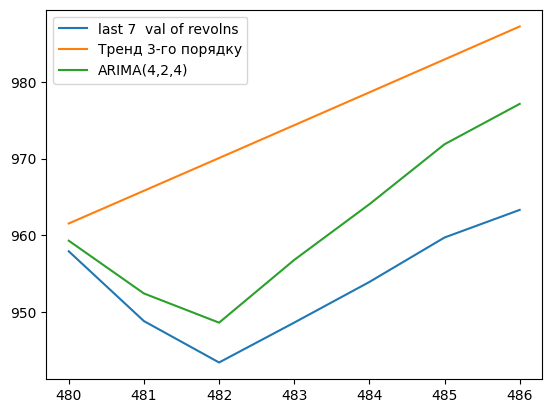

In [581]:
plt.plot(rev_x_test, rev_test, label='last 7  val of revolns')
plt.plot(rev_x_test, rev_pred1, label='Тренд 3-го порядку')
plt.plot(rev_x_test, rev_pred2, label='ARIMA(4,2,4)')
plt.legend()

### Таблиця результатів статичного прогнозування на 7 кроків вперед для nonrev набору

In [582]:
nonrev_x_test=np.arange(len(nonrev_train),len(nonrev_train)+ len(nonrev_test))
nonrev_x_test= nonrev_x_test[:,np.newaxis]
nonrev_y_test= nonrev_test[:,np.newaxis]

Для тренду 3-го порядку:

In [583]:
X_poly = poly_features.fit_transform(nonrev_x_test)
nonrev_pred1 = model3_2.predict(X_poly)

Для ARIMA(1,2,1):

In [584]:
nonrev_pred2 = model4_2.predict(start=len(nonrev_train), end=len(nonrev_train)+len(nonrev_test)-1, exog=nonrev_y_test)

#### Обчислимо статистики(MSE, MAE, MAPE, Theil-a):

MSE:

In [585]:
mse1_2=mean_squared_error(nonrev_y_test, nonrev_pred1)
mse2_2=mean_squared_error(nonrev_y_test, nonrev_pred2)

In [586]:
print(mse1_2)
print(mse2_2)

277.4794198188649
61.476391156623706


MAE:

In [587]:
mae1_2=mean_absolute_error(nonrev_y_test, nonrev_pred1)
mae2_2=mean_absolute_error(nonrev_y_test, nonrev_pred2)

In [588]:
print(mae1_2)
print(mae2_2)

13.84889103546074
7.464246552100316


MAPE:

In [589]:
mape1_2=mape(nonrev_y_test, nonrev_pred1)
mape2_2=mape(nonrev_y_test, nonrev_pred2)

In [590]:
print(mape1_2)
print(mape2_2)

1.059000255490458
0.6809384437628311


Theil-а:

In [591]:
thail_a1_2=thail_a(nonrev_y_test, nonrev_pred1)
thail_a2_2=thail_a(nonrev_y_test, nonrev_pred2)

In [592]:
print(thail_a1_2)
print(thail_a2_2)

1.226175124446857
1.2179657792108955


#### Графік прогнозованих значень:

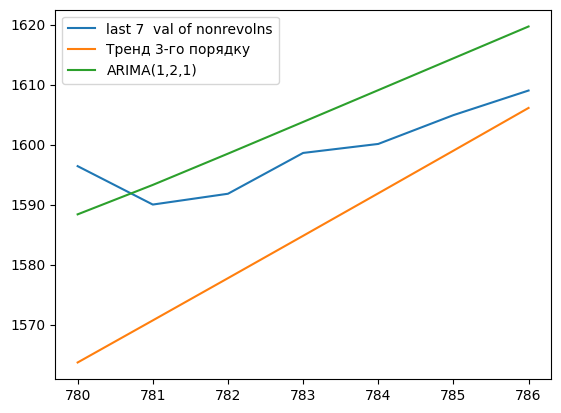

In [593]:
plt.plot(nonrev_x_test, nonrev_test, label='last 7  val of nonrevolns')
plt.plot(nonrev_x_test, nonrev_pred1, label='Тренд 3-го порядку')
plt.plot(nonrev_x_test, nonrev_pred2, label='ARIMA(1,2,1)')
plt.legend()